# Compare MFT vs numeric seq speeds

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from aux import get_c_mean_p
from disp import set_plot

In [2]:
data_md_mft = np.load('data/seq_speed/seqs_md_mft.npy', allow_pickle=True)[0]
MU_J_SEQS_MFT = data_md_mft['MU_J_SEQS']
spds_md_mft = data_md_mft['spds']
ths_md_mft = data_md_mft['ths_all']

data_fd_mft = np.load('data/seq_speed/seqs_fd_mft.npy', allow_pickle=True)[0]
SGM_J_SEQS_MFT = data_fd_mft['SGM_J_SEQS']
spds_fd_mft = data_fd_mft['spds']
ths_fd_mft = data_fd_mft['ths_all']

data_md_full = np.load('data/seq_speed/seqs_md_full.npy', allow_pickle=True)[0]
MU_J_SEQS_FULL = data_md_full['MU_J_SEQS']
spds_md_full = data_md_full['spds']
ths_md_full = data_md_full['ths_all']

data_fd_full = np.load('data/seq_speed/seqs_fd_full.npy', allow_pickle=True)[0]
SGM_J_SEQS_FULL = data_fd_full['SGM_J_SEQS']
spds_fd_full = data_fd_full['spds']
ths_fd_full = data_fd_full['ths_all']

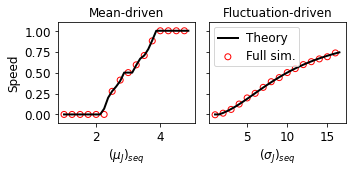

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(5, 2.5), tight_layout=True, sharey=True)
axs[0].plot(MU_J_SEQS_MFT, spds_md_mft, c='k', lw=2)
axs[0].scatter(MU_J_SEQS_FULL, spds_md_full, facecolors='none', edgecolors='r')
set_plot(axs[0], y_lim=(-.1, 1.1), x_label=r'$(\mu_J)_{seq}$', y_label='Speed', title='Mean-driven')

axs[1].plot(SGM_J_SEQS_MFT, spds_fd_mft, c='k', lw=2)
axs[1].scatter(SGM_J_SEQS_FULL, spds_fd_full, facecolors='none', edgecolors='r')
axs[1].legend(['Theory', 'Full sim.'])
set_plot(axs[1], y_lim=(-.1, 1.1), x_label=r'$(\sigma_J)_{seq}$', title='Fluctuation-driven')

fig.savefig('figs/main/4_seq_speed_mean_v_fluc.svg')

## State resolution

In [37]:
D = 16
A = np.arange(0, 2*np.pi, 2*np.pi/D)
bins = np.linspace(0, 1, 2*D+1)

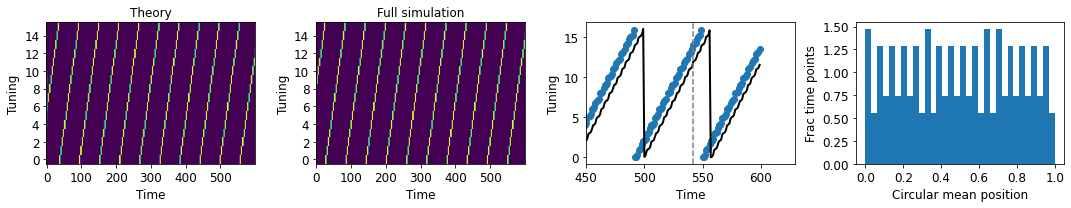

In [50]:
MU_J_SEQ = 2.5

fig, axs = plt.subplots(1, 4, figsize=(15, 3), tight_layout=True)

idx_md_mft = np.argmin(np.abs(MU_J_SEQS_MFT - MU_J_SEQ))
c_means_md_mft = get_c_mean_p(A, ths_md_mft[idx_md_mft])%(2*np.pi)*D/(2*np.pi)
tau_md_mft = 1/spds_md_mft[idx_md_mft]
look_bak_md_mft = int(round(tau_md_mft*D))
axs[0].matshow(ths_md_mft[idx_md_mft].T, origin='lower')
axs[0].set_aspect('auto')
axs[0].set_title('Theory')

idx_md_full = np.argmin(np.abs(MU_J_SEQS_FULL - MU_J_SEQ))
c_means_md_full = get_c_mean_p(A, ths_md_full[idx_md_full])%(2*np.pi)*D/(2*np.pi)
axs[1].matshow(ths_md_full[idx_md_full].T, origin='lower')
axs[1].set_aspect('auto')
axs[1].set_title('Full simulation')

axs[2].plot(c_means_md_mft, c='k', lw=2)
axs[2].scatter(np.arange(len(c_means_md_full)), c_means_md_full)
axs[2].axvline(len(c_means_md_mft) - look_bak_md_mft, c='gray', ls='--')
axs[2].set_xlim(left=450)

for ax in axs[:-1]:
    ax.xaxis.tick_bottom()
    set_plot(ax, x_label='Time', y_label='Tuning')
    
axs[-1].hist(c_means_md_mft[-3*look_bak_md_mft:]/D, bins=bins, density=True)
set_plot(axs[-1], x_label='Circular mean position', y_label='Frac time points')

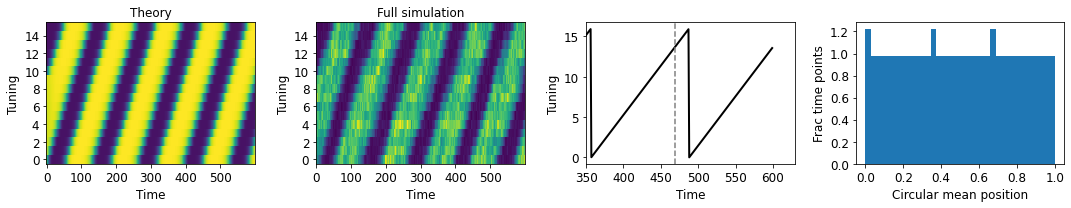

In [42]:
SGM_J_SEQ = 4

fig, axs = plt.subplots(1, 4, figsize=(15, 3), tight_layout=True)

idx_fd_mft = np.argmin(np.abs(SGM_J_SEQS_MFT - SGM_J_SEQ))
c_means_fd_mft = get_c_mean_p(A, ths_fd_mft[idx_fd_mft])%(2*np.pi)*D/(2*np.pi)
tau_fd_mft = 1/spds_fd_mft[idx_fd_mft]
look_bak_fd_mft = int(round(tau_fd_mft*D))
axs[0].matshow(ths_fd_mft[idx_fd_mft].T, origin='lower')
axs[0].set_aspect('auto')
axs[0].set_title('Theory')

idx_fd_full = np.argmin(np.abs(SGM_J_SEQS_FULL - SGM_J_SEQ))
c_means_fd_full = get_c_mean_p(A, ths_fd_full[idx_fd_full])%(2*np.pi)*D/(2*np.pi)
axs[1].matshow(ths_fd_full[idx_fd_full].T, origin='lower')
axs[1].set_aspect('auto')
axs[1].set_title('Full simulation')

axs[2].plot(c_means_fd_mft, c='k', lw=2)
axs[2].axvline(len(c_means_fd_mft) - look_bak_fd_mft, c='gray', ls='--')
axs[2].set_xlim(left=350)

for ax in axs[:-1]:
    ax.xaxis.tick_bottom()
    set_plot(ax, x_label='Time', y_label='Tuning')
    
axs[-1].hist(c_means_fd_mft[-look_bak_fd_mft:]/D, bins=bins, density=True)
set_plot(axs[-1], x_label='Circular mean position', y_label='Frac time points')

## Summary plot for manuscript

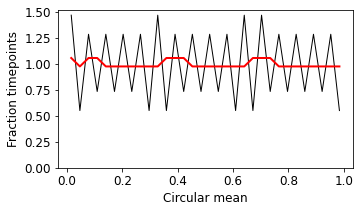

In [49]:
binc = .5*(bins[:-1] + bins[1:])

cts_md_mft = np.histogram(c_means_md_mft[-3*look_bak_md_mft:]/D, bins=bins, density=True)[0]
cts_fd_mft = np.histogram(c_means_fd_mft[-3*look_bak_fd_mft:]/D, bins=bins, density=True)[0]

fig, ax = plt.subplots(1, 1, figsize=(5, 3), tight_layout=True)
ax.plot(binc, cts_md_mft, c='k', lw=1)
ax.plot(binc, cts_fd_mft, c='r', lw=2)
ax.set_ylim(bottom=0)

set_plot(ax, x_label='Circular mean', y_label='Fraction timepoints')

fig.savefig('figs/main/4_seq_circ_mean_hist.svg')